## Unsupervised Learning

## Context: 
-----------------------------
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


----------------------------
## Objective: 
-----------------------------

Identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

--------------------------
## About the data:
--------------------------
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit (currency is not specified, you can make an assumption around this)
- Total_Credit_Cards	- Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made

## Import libraries and overview of the dataset

In [ ]:
# Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

# scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# import clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# if the below line of code gives an error 
# uncomment the following code to install the sklearn_extra library
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

#### Load data

In [ ]:
data = pd.read_excel('Credit Card Customer Data.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Check the info of the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values.
- All columns are of int64 data type.

**There are no missing values. Let us now figure out the uniques in each column.** 

In [ ]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has repeated values. We should treat the same accordingly before applying any algorithm.

## Data Preprocessing and Exploratory Data Analysis

#### **Question 1: Identify and drop the rows with duplicated customer keys (2 Marks)**

In [ ]:
# Identify the duplicated customer keys
duplicate_keys = data.duplicated(subset =['Customer Key'])

In [ ]:
# Drop duplicated keys

data = data.drop_duplicates(subset = ['Customer Key'])

We have done some basic checks. Now, let's drop the variables that are not required for our analysis.

In [ ]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

Now that we have dropped unnecessary column. We can again check for duplicates. Duplicates would mean customers with identical features.

In [ ]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


Drop these duplicated rows from the data

In [ ]:
data=data[~data.duplicated()]

In [ ]:
data.shape

(644, 5)

- After removing duplicated keys and rows and unnecessary columns, there are 644 unique observations and 5 columns in our data.

#### Summary Statistics

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**
1. Avg_Credit_Limit	- It seems highly right-skewed. The max value is way far from the mean and median.
2. Total_Credit_Cards - It loooks some level of left-skwed but not sure if it's moderate yet.
3. Total_visits_bank - It is right skewed. The max value is pretty close to the mean and median. 
4. Total_visits_online - It could be highly right-skewed since it's max value is much far away to 15.
5. Total_calls_made - It could be highly right-skewed.**

#### Check the distribution and outliers for each variable in the data.


- **Check the distribution of all variables (use .hist() attribute)**
- **Check outliers for all variables with sns.boxplot**

Avg_Credit_Limit
Skew : 2.19


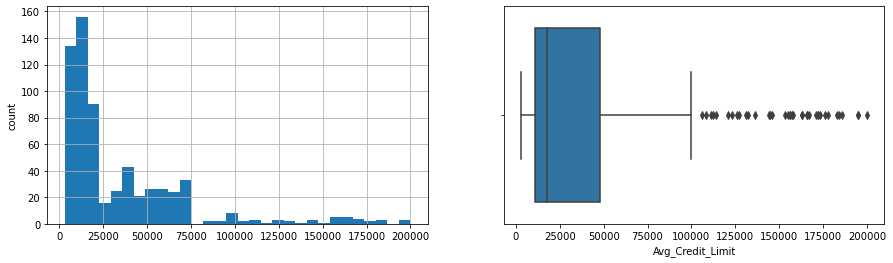

Total_Credit_Cards
Skew : 0.17


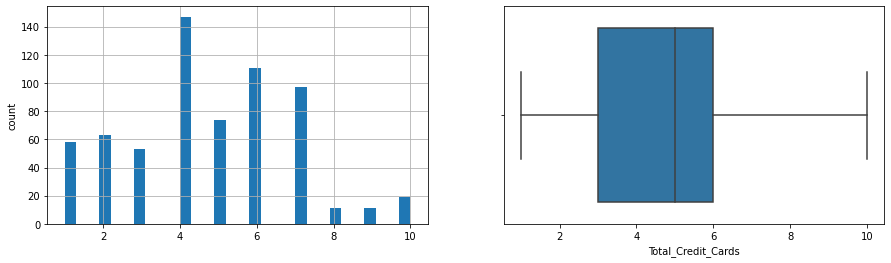

Total_visits_bank
Skew : 0.15


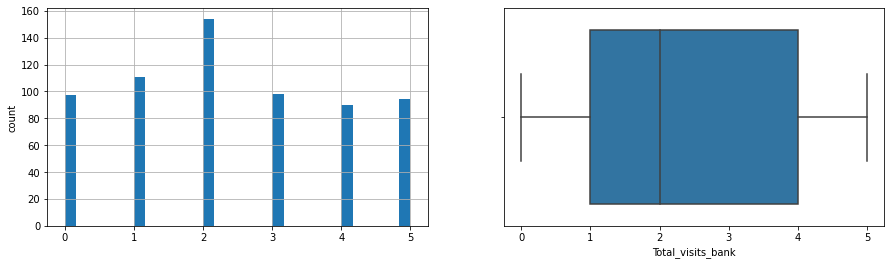

Total_visits_online
Skew : 2.21


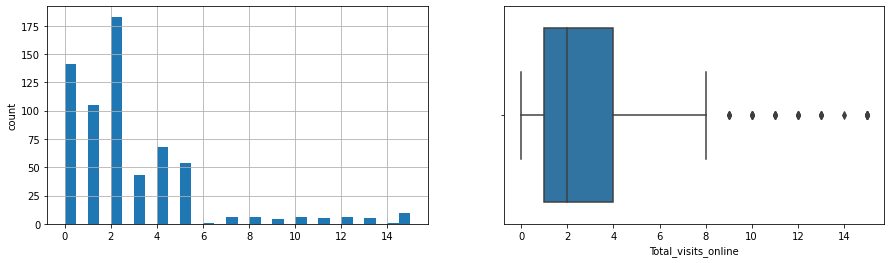

Total_calls_made
Skew : 0.65


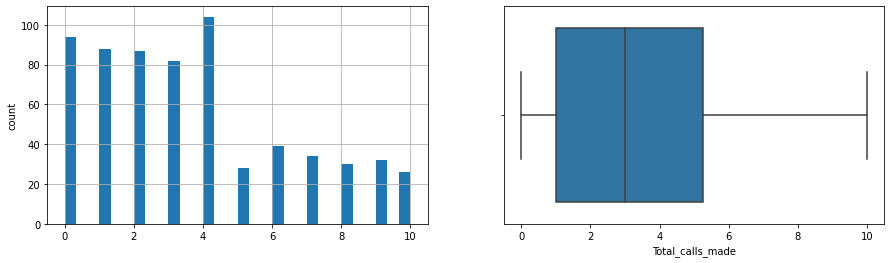

In [ ]:
# Uncomment and complete the code by filling the blanks 

for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observation:**
1. Avg_Credit_Limit - Skew 2.19 is not purely skwed - it's clearly a power-law distribtion which means a small group of people has a very high average credit limit (e.g. > 75K) and a large group of people has a very low average credit limit (e.g. < 25K).
2. Total_Credit_Cards - It's a discrete distribution ragnes from 1 to 10. It looks not far away from symmetric.
3. Total_visits_bank - It's a discrete distribution ragnes from 0 to 5. It looks not far away from symmetric
4. Total_visits_online - Skew 2.21 is not purely skwed - it's clearly a power-law distribtion which means a small group of people has a very high total visit online (e.g. >= 7) and a large group of numbers has a very low total visit online (e.g. <= 2).
5. Total_calls_made - It's not an easy distribution to name - we may say it's a not a sigficiant power-law distribution.  A relatively small group of people has a high total calls made (e.g. >=5) and a relatively larger group of people has a low total calls made (e.g. <=  4).

**Check the correlation among different variables.**

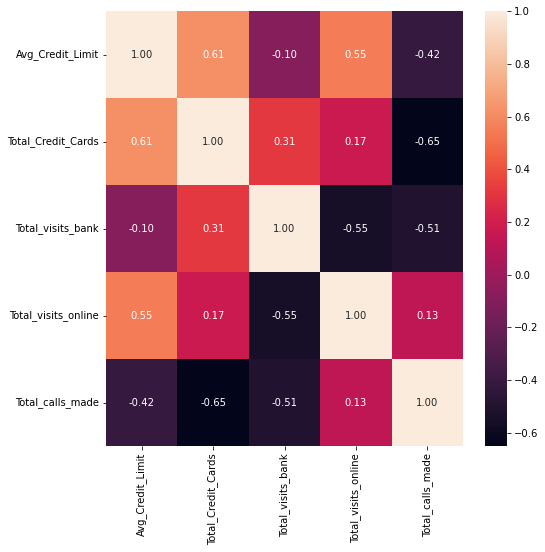

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observation:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

#### Scale the data

In [ ]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982
1,0.413280,-0.779381,-1.473803,2.495669,1.873420
2,0.413280,1.060843,-0.858684,0.127148,0.135974
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974
4,1.750192,0.600787,-1.473803,3.172390,-0.211515


In [ ]:
# Create copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means

Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the SSE for each k
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and find the elbow

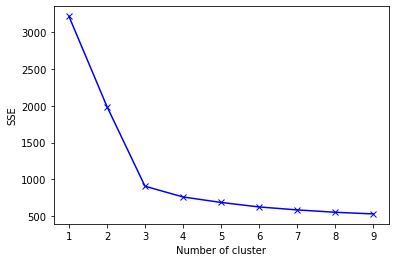

In [ ]:
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

- Looking at the plot, we can say that elbow point is achieved for k=3.
- We will fit the k-means again with k=3 to get the labels.

**From the above elbow plot, state the reason for choosing k=3 and with random_state=1**
1. Choosing k = 3 : According to the elbow plt we learned, k=3 is exactly the turning point the stiff speed of downloping dramatically changes to very flat decreasing. Elbow plot observation gives us an excellent intuition that k = 3 could be the best fitting culster numbers becuase SSE won't change too much with the numbers of cluster keep growing.
2. Choosing random_state = 1 : Random_state is very helpful in machine learning for two major reasons: 
    a) For reproducibility/repeatability - Just incase I want to publish my results or share them with other colleagues, they can reproducce/repeat easily.
    b) For turning purpose - If I'm tuning the model, in an experiment I could keep all variables constant except the one(s) I'm tuning to make it more repeatable/reproducible.**
**Fit the K-means algorithms on the scaled data with number of cluster equal to 3**
1. It's done with n-culsters = 3, random_sate = 1. 
2. Please kindly see code to fit the K-means algorithms on the scaled data as below. **
**Store the predictions as 'Labels' to the 'data_scaled_copy' and 'data' dataframes**
1. With the kemans.predict we could store the predictions as code below.
2. With dataframes['Labels'] we can clearly store it in Labels column as code below.

In [ ]:
# Apply the K-Means algorithm
kmeans = KMeans(n_clusters = 3, random_state= 1) 

# Fit the kmeans function on the scaled data
kmeans.fit(data_scaled) 

# Add predicted labels to the original data and scaled data 
# Save the predictions on the scaled data from K-Means
data_scaled_copy['Labels'] = kmeans.predict(data_scaled) 
# Save the predictions on the scaled data from K-Means
data['Labels'] = kmeans.predict(data_scaled) 

Look at the various features based on the labels.

#### **Create cluster profiles using the below summary statistics and box plots for each label**

In [ ]:
# Number of observations in each cluster
data.Labels.value_counts()

1    374
0    221
2     49
Name: Labels, dtype: int64

In [ ]:
# Calculate summary statistics of the original data for each label
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


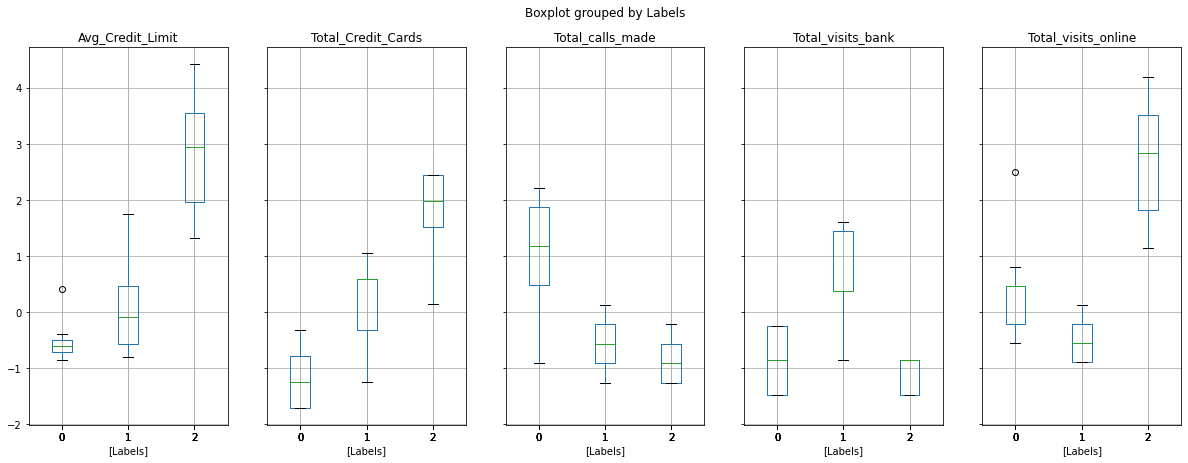

In [ ]:
# Visualize different features w.r.t K-means labels
data_scaled_copy.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:**

1. Cluster 0 - Firstly, this cluster has the lowest average credit limit and credit card numbers. It indicates they are not interested or capable of credit card usage. However, they do utilize more communication tools by phone calls, which is the easiest traditional way to engage without physically going out. Their bank visits and online visits are not high, too. In comparison to Cluster 1, we may have a hunch this cluster stands for the elder group who probably use cash or check more and make the phone call more.
2. Cluster 1 - on the contrary to Cluster 0, this cluster has more credit limits and credit cards to use, but is still far away from the final cluster 3. This cluster 2 has the most mobility to visit banks to engage, but their calls made and online visits are not high, too. Potentially this group has lower income, less technology capability, but has more chances to visit the bank in their daily life.
3. Cluster 2 - It's obvious cluster 2 has a very different profile specifically from every attributes across the board: Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, and Total_calls_made. All the values of attributes are significantly the highest/lowest among the three clusters. This cluster is financially healthy and safe with deeper pocket and credit limits, more credit cards to utilize with flexibility. This cluster also tends to make the lowest calls and the fewest visit to the bank - which are the traditional approaches to engage with banks. They also have the highest online visits which means they are much more technology-savvy to utilize online tools. In a nutshell, it's a very beneficial cycle in which banks or financial institutions like to interact the most.
4. Overall, this K-mean result in 3 clusters is pretty helpful as an unsupervised machine learning approach to understand the customer profile more to make better business decisions.**


## Gaussian Mixture

Let's create clusters using Gaussian Mixture Models

####**Apply the Gaussian Mixture algorithm on the scaled data with random_state=1** 
- **Create cluster profiles using the below summary statistics and box plots for each label**
- **Compare the clusters from both algorithms - K-means and Gaussian Mixture (1 Mark)**

In [ ]:
# Apply the Gaussian Mixture algorithm
gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(data_scaled) 

# Fit the gmm function on the scaled data
data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [ ]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

In [ ]:
# Calculate summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


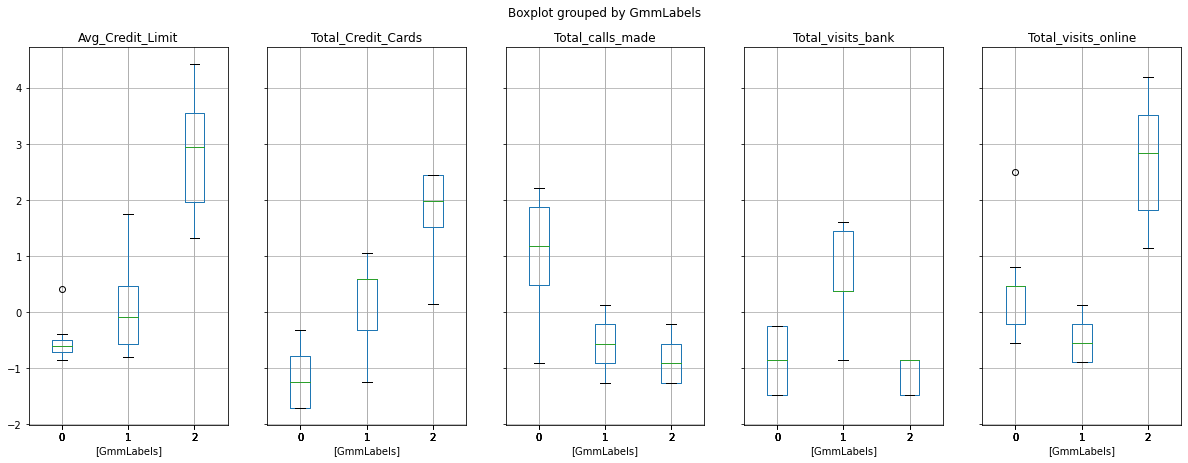

In [ ]:
# plot boxplots with the new GMM based labels
features_with_lables = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","GmmLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:**
1. Cluster 0 - Firstly, this cluster has the lowest average credit limit and credit card numbers. It indicates they are not interested or capable of credit card usage. However, they do utilize more communication tools by phone calls, which is the easiest traditional way to engage without physically going out. Their bank visits and online visits are not high, too. In comparison to Cluster 1, we may have a hunch this cluster stands for the elder group who probably use cash or check more and make the phone call more.
2. Cluster 1 - on the contrary to Cluster 0, this cluster has more credit limits and credit cards to use, but is still far away from the final cluster 3. This cluster 2 has the most mobility to visit banks to engage, but their calls made and online visits are not high, too. Potentially this group has lower income, less technology capability, but has more chances to visit the bank in their daily life.
3. Cluster 2 - It's obvious cluster 2 has a very different profile specifically from every attributes across the board: Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, and Total_calls_made. All the values of attributes are significantly the highest/lowest among the three clusters. This cluster is financially healthy and safe with deeper pocket and credit limits, more credit cards to utilize with flexibility. This cluster also tends to make the lowest calls and the fewest visit to the bank - which are the traditional approaches to engage with banks. They also have the highest online visits which means they are much more technology-savvy to utilize online tools. In a nutshell, it's a very beneficial cycle in which banks or financial institutions like to interact the most.
4. Overall, this GMM result in 3 clusters is pretty helpful as an unsupervised machine learning approach to understand the customer profile more to make better business decisions.**

**Comparing Clusters:
1. As mentioned above, since it's exactly the same. We're cauitiously check but it's really the same. Though it's rare, it's possible. Amazingly but it could happen that the result of the cluster profile from GMM is the same as the result from K-mean. I believe it happens that they do cluster the same point to generate the exact the same result. Basically we thought the cluster-wise, the Cluster 2 in GMM is very different from the Culster 0 and Cluster 1. They are totally different animals. The Cluster 0 and the cluster 1 are a little bit similar specifically from credit limit viewpoint, but still different in some attributes to compare as above. **

## K-Medoids

####**Apply the K-Mediods on the scaled data with random_state=1** 
**Create cluster profiles using the below summary statistics and box plots for each label**
**Compare the clusters from both algorithms - K-Means and K-Medoids**

In [ ]:
# Apply the K-Medoids algorithm
kmedo = KMedoids(n_clusters = 3, random_state = 1) 

# Fit the kmedo function on the scaled data
kmedo.fit(data_scaled) 

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [ ]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

In [ ]:
# Calculate summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


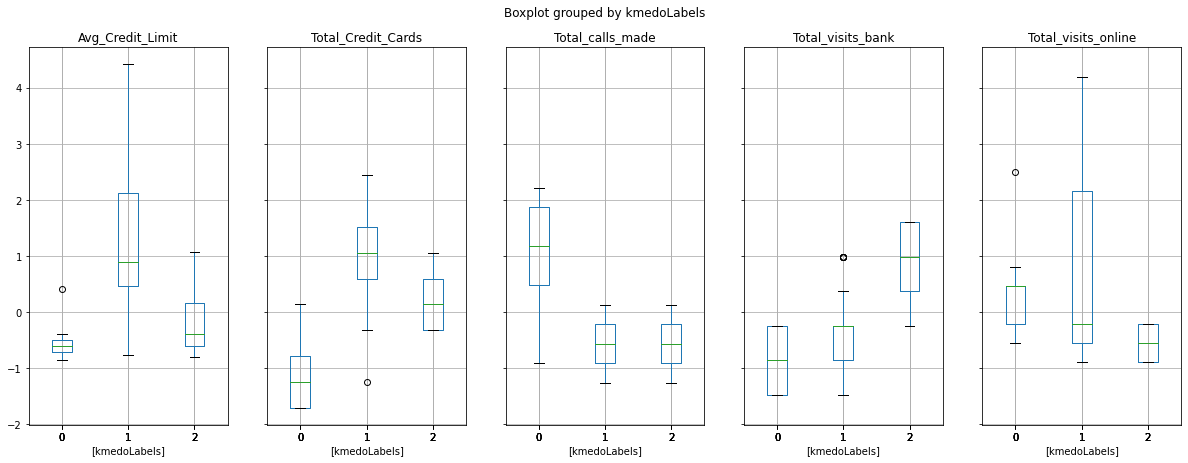

In [ ]:
# plot boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit",	"Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","kmedoLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1,5),figsize=(20,7))
plt.show()

Compare the clusters from K-Means and K-Medoids 

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis=1)[original_features]
comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,12239.819005,2.423423,2.411765,0.950450,0.945701,3.554054,3.561086,6.878378,6.891403
group_1 Mean,85052.631579,33893.048128,7.030075,5.508021,1.691729,3.489305,4.639098,0.975936,1.969925,1.997326
group_2 Mean,28449.826990,140102.040816,5.363322,8.775510,3.830450,0.591837,0.982699,10.979592,1.851211,1.102041
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,68000.000000,31500.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,20000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Cluster Profiles:**
1. Cluster 0 - Firstly, this cluster has the lowest average credit limit and credit card numbers, especially credit card quanitity. It indicates they are not interested or capable of credit card usage. However, they do utilize the highest communication tools by phone calls, which is the easiest traditional way to engage without physically going outdoor. Their bank visits and online visits are low, especially the bank visit. 
2. Cluster 1 -  This cluster is financially healthy and safe with deeper pocket and credit limits, more credit cards to utilize with flexibility. This cluster also tends to make the lowest calls and the less visit to the bank - which are the traditional approaches to engage with banks. They have a wide range of online visits from low to the high.
3. Cluster 2 - This cluster 2 has more mobility to visit banks to engage, but their calls made and online visits are very low. Potentially this group has lower income, less technology capability, but has more chances to visit the bank in their daily life.
4. In a nutshell, it's a very beneficial cycle in which banks or financial institutions like to interact the most.**

**Comparing Clusters:**
1. In comparison to Cluster 1, we may have a hunch cluster 0 stands for the elder group who probably use cash or check more and make the phone call more. 
2. It's obvious cluster 1 has a very different profile specifically from every attributes almost across the board: Avg_Credit_Limit, Total_Credit_Cards, Total_visits_online, and Total_calls_made. Almost all the values of attributes are significantly the highest/lowest among the three clusters.
3. On the contrary to Cluster 0, the cluster 2 has a little bit more credit limits and credit cards to use, but is still far away from the cluster 1. **